# Particle In a Box

The Schödinger equation can be solved analytically for simple systems, but more complex systems require numerical methods to compute approximate solutions. In this notebook, we will compare the analytical solution for a single-dimensional particle-in-a-box problem with the solution obtained by the variational method.

## Analytical Solution

The derivation of the analytical solution for a 1-D particle in a box problem can be found in section 4.6 of Oxtoby (7th edition). See how the solution changes as you modify the quantum number $n$.

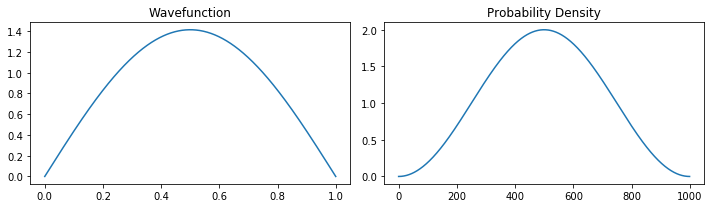

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 1 # box length
n = 1 # quantum number
x = np.linspace(0, L, 1000) # x position

psi_true = np.sqrt(2 / L) * np.sin(n * np.pi / L * x)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(x, psi_true)
plt.title("Wavefunction")
plt.subplot(1, 2, 2)
plt.plot(psi_true ** 2)
plt.title("Probability Density")
plt.tight_layout()
plt.show()

## Numerical Solution

The variational method allows us to estimate the wavefunction by approximating it with a parameterized function that satisfies the boundary conditions, and then minimizing the total energy. You can learn more about the variational method [here](https://en.wikipedia.org/wiki/Variational_method_(quantum_mechanics)).

Trial Energy: 0.1435767684688836


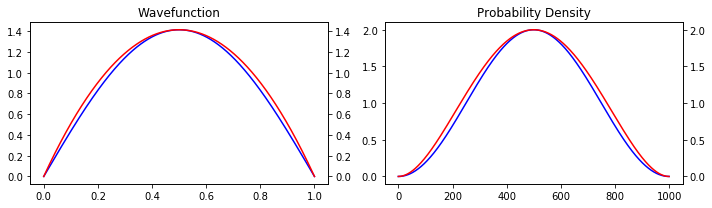

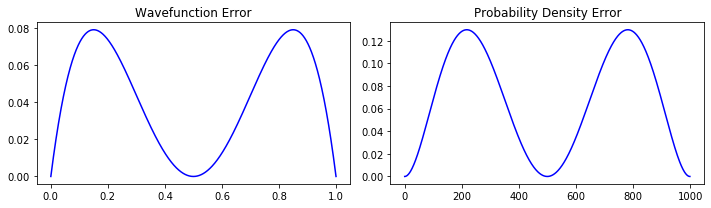

In [10]:
# approximate the n=2 quantum state
psi_true = np.sqrt(2 / L) * np.sin(1 * np.pi / L * x)

# polynomial coefficients (highest order first)
p = np.array([0, 0, 0, 1, 0]) # <-- see what happens when you change these

# approximate wavefunction as a polynomial in x(1-x)
psi_trial = np.polyval(p, x*(1-x))
psi_trial *= np.max(psi_true) / np.max(psi_trial) # normalization

# compute energy from variational theorem
first_deriv = np.diff(psi_trial) / 0.001
second_deriv = np.diff(first_deriv) / 0.001
H = -0.5 / (2*np.pi)**2 * second_deriv
var_num = np.sum(psi_trial[:-2] * H * psi_trial[:-2])
var_denom = np.sum(psi_trial[:-2] * psi_trial[:-2])
E_trial = var_num / var_denom
print("Trial Energy:", E_trial)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(x, psi_true, color='blue')
plt.gca().twinx()
plt.plot(x, psi_trial, color='red')
plt.title("Wavefunction")
plt.subplot(1, 2, 2)
plt.plot(psi_true ** 2, color='blue')
plt.gca().twinx()
plt.plot(psi_trial ** 2, c='red')
plt.title("Probability Density")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(x, psi_trial - psi_true, color='blue')
plt.title("Wavefunction Error")
plt.subplot(1, 2, 2)
plt.plot(psi_trial ** 2 - psi_true ** 2, color='blue')
plt.title("Probability Density Error")
plt.tight_layout()
plt.show()